# MNIST Dataset

http://yann.lecun.com/exdb/mnist/ 

MNIST dataset is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.

It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.<br>

Four files are available on this site:<br>
1. train-images-idx3-ubyte.gz:  training set images (47,040,016 bytes, 16-byte header + 60,000x28x28 gray images)
2. train-labels-idx1-ubyte.gz:  training set labels (60,008 bytes, 8-byte header + 60,000 ubyte)
3. t10k-images-idx3-ubyte.gz:   test set images (7,840,016 bytes, 16-byteheader + 10,000x28x28 grey images)
4. t10k-labels-idx1-ubyte.gz:   test set labels (10,008 bytes, 8-byte header + 10,000 ubyte)
<br>

The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.


# FILE FORMATS FOR THE MNIST DATASET

## TRAINING SET IMAGE FILE (train-images-idx3-ubyte):

[offset] [type]          [value]          [description]<br>
0000     32 bit integer  0x00000803(2051) magic number<br>
0004     32 bit integer  60000            number of images<br>
0008     32 bit integer  28               number of rows<br>
0012     32 bit integer  28               number of columns<br>
0016     unsigned byte   ??               pixel<br>
0017     unsigned byte   ??               pixel<br>
........<br>
xxxx     unsigned byte   ??               pixel<br>
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).<br>

## TRAINING SET LABEL FILE (t10k-labels-idx1-ubyte):

[offset] [type]          [value]          [description]<br>
0000     32 bit integer  0x00000801(2049) magic number (MSB first)<br>
0004     32 bit integer  10000            number of items<br>
0008     unsigned byte   ??               label<br>
0009     unsigned byte   ??               label<br>
........<br>
xxxx     unsigned byte   ??               label<br>
The labels values are 0 to 9.<br>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Read and explore the dataset

In [3]:
# Read train images (60,000x28x28 ubyte)
train_images = np.fromfile('./data/train-images.idx3-ubyte', dtype = np.ubyte)
train_images = train_images[16:].reshape(60000, 28, 28)

# Read train image labels (60,000 ubyte)
train_labels = np.fromfile('./data/train-labels.idx1-ubyte', dtype = np.ubyte)
train_labels = train_labels[8:]


FileNotFoundError: [Errno 2] No such file or directory: './data/train-images.idx3-ubyte'

(3, 164, <matplotlib.image.AxesImage at 0x1fabe2ca430>)

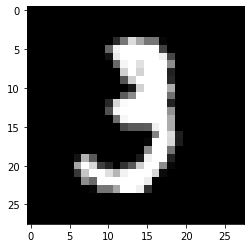

In [5]:
# Display some train_images with their labels
idx = 10
train_labels[idx],train_images[idx, 20, 6], plt.imshow (train_images[idx], cmap = 'gray')

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

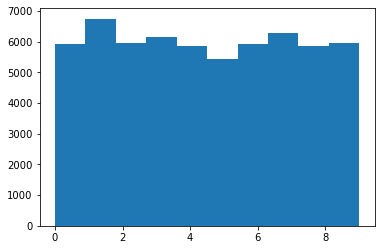

In [4]:
plt.hist(train_labels)

In [5]:
# Count number of images per digit (i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,)
def numImages (d, Y): 
# Input:
#  d is digit between 0 and 1
#  Y is an array of labels
    n = np.int32(0)
    for v in Y:
        if v == d:
            n += 1
    return n

In [6]:
%%time
digit_count = []
for d in range(0,10):
    digit_count.append(numImages(d,train_labels))

Wall time: 783 ms


In [7]:
digit_count

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

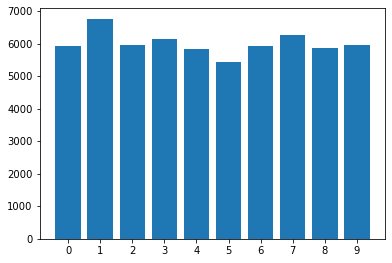

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(range(10), digit_count)
ax.set_xticks(range(10))

In [7]:
# Read test images (10,000x28x28 ubyte)
test_images = np.fromfile('./data/t10k-images.idx3-ubyte', dtype = np.ubyte)
test_images = test_images[16:].reshape(10000, 28, 28)

# Read test image labels (10,000 ubyte)
test_labels = np.fromfile('./data/t10k-labels.idx1-ubyte', dtype = np.ubyte)
test_labels = test_labels[8:]

FileNotFoundError: [Errno 2] No such file or directory: './data/t10k-images.idx3-ubyte'

In [5]:
# Display some train_images with their labels
idx = 10
test_labels[idx],test_images[idx, 20, 6], plt.imshow (test_images[idx], cmap = 'gray')

NameError: name 'test_labels' is not defined

In [4]:
# plot the first 30 images in the train image set
plt.figure(figsize=(10,14)) # width, height in inch of the plot
for k, image in enumerate(train_images[:30]):
    plt.subplot(6, 5, k+1)
    plt.imshow(image, cmap='gray')
    plt.title(str(k) + "-th train image", fontsize = 9)


NameError: name 'train_images' is not defined

<Figure size 720x1008 with 0 Axes>

In [8]:
# plot the first 30 images in the test image set
plt.figure(figsize=(10,14)) # width, height in inch of the plot
for k, image in enumerate(test_images[:30]):
    plt.subplot(6, 5, k+1)
    plt.imshow(image, cmap='gray')
    plt.title(str(k) + "-th test image", fontsize = 9)


NameError: name 'test_images' is not defined

<Figure size 720x1008 with 0 Axes>

## Convert image pixel data type (ubyte) to Float32

In [14]:
# Convert ubyte to flaot32 and nomalize
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

(5, 0.49411765, <matplotlib.image.AxesImage at 0x18f00005f10>)

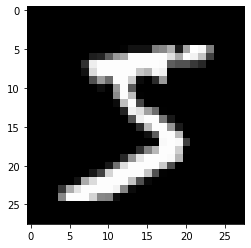

In [13]:
train_labels[0], train_images[0, 5, 16], plt.imshow (train_images[0], cmap = 'gray')

(6, <matplotlib.image.AxesImage at 0x1d76f2b1490>)

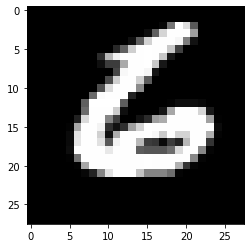

In [16]:
test_labels[9999], plt.imshow (test_images[9999], cmap = 'gray')

In [18]:
# Compute mean image of train images with 0 label
mean_0 = np.zeros(28*28, dtype = np.float32)
train = train_images.reshape(60000, 28*28)

In [20]:
%%time
n = 0
for i in range(60000):
    if train_labels[i] == 0:
        n += 1
        for j in range (28*28):
            mean_0[j] += train[i, j]
mean_0 /= n

Wall time: 2.31 s


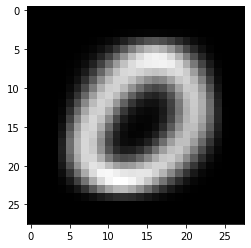

In [22]:
plt.imshow (mean_0.reshape(28,28), cmap = 'gray')

In [23]:
# Compute mean image of train images with 9 label
mean_9 = np.zeros(28*28, dtype = np.float32)

In [24]:
%%time
n = 0
for i in range(60000):
    if train_labels[i] == 9:
        n += 1
        for j in range (28*28):
            mean_9[j] += train[i, j]
mean_9 /= n

Wall time: 2.39 s


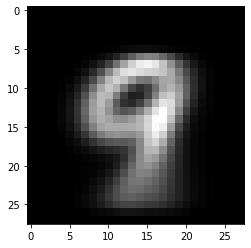

In [25]:
plt.imshow (mean_9.reshape(28,28), cmap = 'gray')

## Write dataset to binary files

The MNIST dataset is exported to four binary files (all in little endian):

1. `train-images.bin`

   60,000 28x28 train images in normalized float32 (i.e., pixel values are betwwen 0 and 1)<br><br>
   
2. `train-labels.bin`

   60,000 ubyte array<br><br>
   
3. `est-images.bin`

   10,000 28x28 test images in normalized float32 (i.e., pixel values are betwwen 0 and 1)<br><br>
   
4. `test-labels.bin`

   10,000 ubyte array<br>

In [ ]:
# Write train_images and test_images to binary files
train_images.tofile('./data/train-images.bin') # needs about 179 MB of disk space
test_images.tofile('./data/test-images.bin') # needs about 29.9 MB of disk space

In [ ]:
# Write train_labels and test_labels to binary files
train_labels.tofile('./data/train-labels.bin') 
test_labels.tofile('./data/test-labels.bin')

## Notes

The train and test image datasets also have been combined and written to

        X2 (70000 28x28 float32)
        
and train and test labels been combined and converted to one-hot uint64 vector, and written to:

        Y2 (70000 10 float32)

In [35]:
images = np.fromfile('./data/X2.bin', dtype = np.float32)
images = train_images2.reshape(70000, 28, 28)

In [36]:
labels = np.fromfile('./data/Y2.bin', dtype = np.float32)
labels = labels.reshape(70000, 10)

In [41]:
def from_one_hot_vector (v):
    for i in range(len(v)):
        if v[i] == 1:
            return i
    return -1

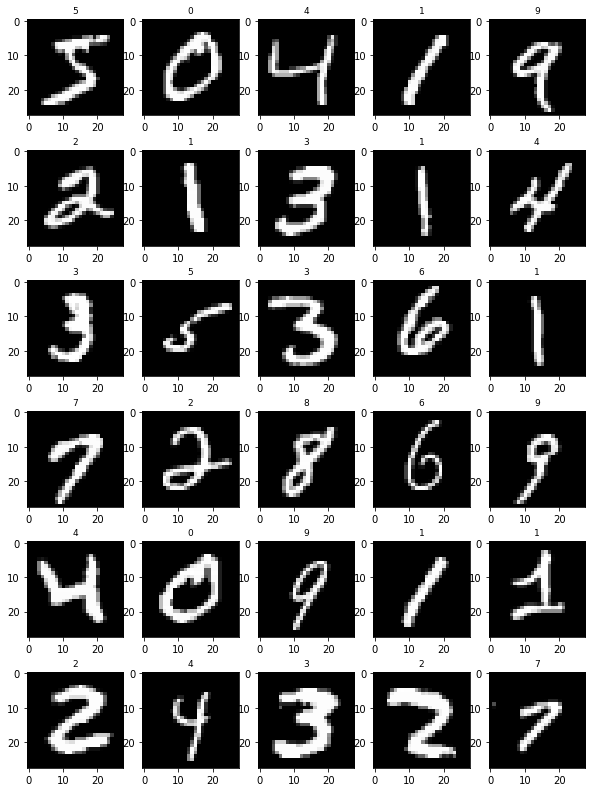

In [42]:
# plot the first 30 images in the train image set
plt.figure(figsize=(10,14)) # width, height in inch of the plot
for k, image in enumerate(images[:30]):
    plt.subplot(6, 5, k+1)
    plt.imshow(image, cmap='gray')
    plt.title(from_one_hot_vector(labels[k]), fontsize = 9)


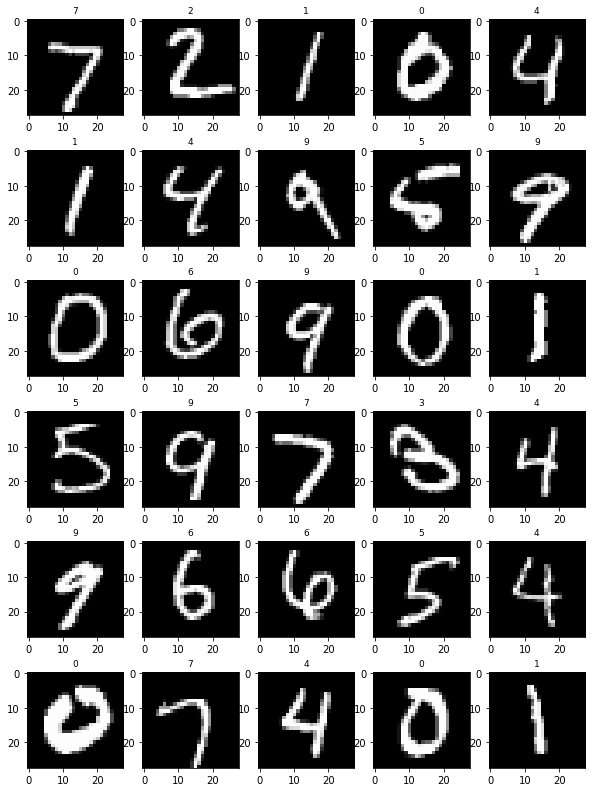

In [43]:
# plot the first 30 images in the test image set
plt.figure(figsize=(10,14)) # width, height in inch of the plot
for k, image in enumerate(images[60000:60030]):
    plt.subplot(6, 5, k+1)
    plt.imshow(image, cmap='gray')
    plt.title(from_one_hot_vector(labels[60000+k]), fontsize = 9)
